In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAALKQEIAALKKEAAALKWEIAALKQGYY', 'GEIAALKQEIAALKKEAAALKWEIAALKQGYY']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 32, 5.0, 200, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	61   	-926.833	36.2455	-1051.47	-871.574
1  	66   	-960.74 	23.4853	-1051.47	-929.605
2  	70   	-979.123	20.7838	-1051.47	-953.087
3  	64   	-995.584	21.1472	-1051.47	-973.688
4  	74   	-1008.66	20.5902	-1051.47	-980.015
5  	63   	-1020.06	17.4669	-1052.22	-993.841
6  	67   	-1033.03	16.4621	-1071.04	-1009.79
7  	71   	-1048.67	9.59589	-1075.2 	-1024.12
8  	56   	-1053.44	7.1611 	-1075.93	-1047.07
9  	62   	-1057.09	9.12077	-1075.93	-1049.11
10 	61   	-1061.69	10.27  	-1075.93	-1051.41
11 	69   	-1069.24	7.89909	-1076   	-1051.47
12 	76   	-1073.75	1.97402	-1076   	-1069.25
13 	97   	-1075.36	0.433014	-1076.01	-1073.99
14 	58   	-1075.63	0.241669	-1076.18	-1075.2 
15 	69   	-1075.81	0.141401	-1076.18	-1075.57
16 	75   	-1075.94	0.104438	-1076.18	-1075.78
17 	63   	-1075.95	0.0951662	-1076.18	-1075.8 
18 	53   	-1075.98	0.0861962	-1076.18	-1075.84
19 	77   	-1076.03	0.0843284	-1076.25	-1075.9 
20 	70   	-1076.04	0.0790844	-1076.25	-1075.9

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1076.3154854416207

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

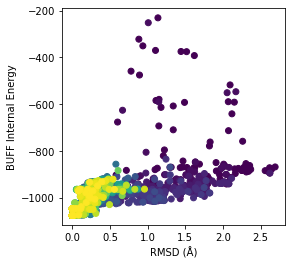

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Di-A17-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-869.371	109.556	-1071.31	-241.915
1  	100  	-909.873	37.0162	-1071.31	-790.035
2  	100  	-921.396	34.1984	-1071.31	-797.565
3  	100  	-934.507	30.5159	-1071.31	-867.891
4  	100  	-952.343	31.4431	-1071.31	-886.069
5  	100  	-964.588	29.7358	-1071.31	-899.605
6  	100  	-978.093	27.3677	-1071.31	-927.43 
7  	100  	-989.284	27.7768	-1071.71	-929.751
8  	100  	-998.366	25.2448	-1071.71	-940.932
9  	100  	-1005.95	24.4952	-1071.71	-943.244
10 	100  	-1016.63	24.0381	-1075.44	-968.126
11 	100  	-1026.49	23.1608	-1075.44	-980.85 
12 	100  	-1032.45	21.0288	-1075.44	-980.85 
13 	100  	-1038.82	19.988 	-1075.44	-985.221
14 	100  	-1044.33	18.0574	-1075.44	-1010.65
15 	100  	-1050.24	16.9293	-1075.44	-1014.68
16 	100  	-1056.27	15.7869	-1075.44	-1018.64
17 	100  	-1061.11	13.4437	-1075.44	-1024.69
18 	100  	-1066.72	9.58692	-1075.64	-1038.67
19 	100  	-1070.42	5.98105	-1075.97	-1041.37
20 	100  	-1072.59	2.82288	-1075.97	-1054.72
21 	100  	

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1076.1673139358165

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

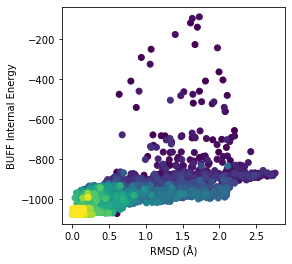

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Di--A17-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max   
0  	100  	-809.56	184.172	-1040.54	-171.7
1  	81   	-886.612	111.354	-1045.73	-411.88
2  	66   	-892.812	124.512	-1050.18	-301.867
3  	77   	-749.846	223.538	-1010.17	0.246241
4  	94   	-793.509	233.567	-1068.29	0.246241
5  	86   	-889.039	150.759	-1051.42	0.246241
6  	55   	-912.792	101.966	-1033.31	-461.588
7  	57   	-899.275	103.818	-1033.31	-431.585
8  	72   	-903.757	98.1294	-1073.06	-434.717
9  	74   	-878.599	165.819	-1062.62	-18.3332
10 	80   	-868.711	148.031	-1011.49	-18.3332
11 	93   	-833.188	148.942	-966.132	-312.201
12 	99   	-888.861	107.661	-982.709	-390.741
13 	71   	-866.188	135.911	-1031.57	-311.571
14 	60   	-824.878	150.516	-1011.83	-311.571
15 	84   	-822.225	161.709	-1043.08	-386.237
16 	69   	-838.047	162.712	-1043.08	-386.237
17 	72   	-863.633	149.861	-1020.5 	-386.237
18 	83   	-897.22 	68.2828	-1045.06	-494.133
19 	87   	-826.249	160.377	-988.046	-257.156
20 	79   	-871.095	149.075	-1051.91	-285.906
21 	61   	-887.59

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1073.0630849292527

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

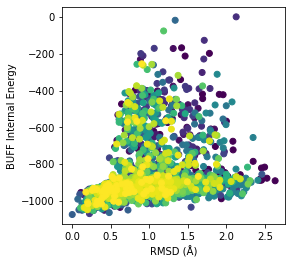

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Di-A17-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-736.091	172.712	-980.645	-264.653
1  	100  	-844.312	128.816	-980.377	-407.442
2  	100  	-902.108	105.943	-1072.12	-369.005
3  	100  	-959.048	34.9214	-1071.12	-827.906
4  	100  	-978.605	25.8234	-1067.93	-931.615
5  	100  	-992.383	26.8084	-1070.32	-956.302
6  	100  	-1003.11	34.0832	-1074.89	-927.749
7  	100  	-1002.02	44.089 	-1073.34	-882.042
8  	100  	-1014.23	37.9224	-1074.64	-928.454
9  	100  	-1054.01	24.0012	-1076.15	-964.405
10 	100  	-1060.26	20.1821	-1075.25	-961.745
11 	100  	-1065.42	16.2491	-1075.86	-967.887
12 	100  	-1064.39	17.7036	-1075.7 	-966.007
13 	100  	-1070.92	9.85811	-1076.01	-1020.56
14 	100  	-1066.14	13.3155	-1076.09	-1021.21
15 	100  	-1066.73	13.021 	-1076.13	-1045.87
16 	100  	-1064.86	13.6454	-1076.07	-1045.96
17 	100  	-1068.02	12.5188	-1076.27	-1046.45
18 	100  	-1065.88	13.4587	-1076.32	-1046.44
19 	100  	-1070.79	10.9527	-1076.28	-1047.08
20 	100  	-1063.95	14.1236	-1076.37	-1046.64
21 	100  	

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1076.371833506902

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

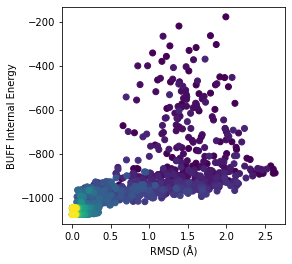

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Di-A17-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)